HR Analytics Capstone Project
-----

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.


Understanding the Problem Statement
-------

In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify how salary is varying with respect to other considerable factors.

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model

Here we are going to
----

1.Understanding the data set - Feature description provided below.
2.Check the number of variables that are normally distributed & explain.
3.Finding out the correlation between variables using spearman rank correlation & explain
4.Examinning the relationship between categorical variables and the dependent variable & explain
5.Clean and pre-process the data with other operations required, like, missing values, handling outliers, etc.
6.Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable for the same 


1.Understanding the Dataset 
a.Describing the dataframe

2.Performing EDA 
a.checking for number of columns and rows 
b.Checkiing for non_null
c.Checking for datatypes
d.Checking for the columns which are categorical and nnumerical
e.Checking for duplicate files
f.Checking for Normality
g.Checking for shape and size
h.Checking Unique values

3.Finding out corelation between variables using Spearman's Corelation

4.how salary is varying with respect to other considerable factors

5.Apply ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable for the same.
a.Using Train and test split 
b.implementing and finding out which model has good score
c. Slecting the model and implementing the model
d.Conclusion



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import pingouin as pg
import warnings 
warnings.filterwarnings(('ignore'))
sns.set_style('darkgrid')

In [2]:
#importing the data set using 'Pandas' library.
df=pd.read_csv('New_Data_Set.csv')
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


Basic info about the columns
--------------------------------------------
Gender - talks of the gender - Male or female
Business - if the person has a business or no
Age - age of the person
Salary - CTC of the employee
Dependants - number of people dependant on the person
Months - duration of the person employed with the company
Calls - if the person has authority to make calls or not
Type - salary settlement type
Billing - Subscribed to billing plans or no
Unit sales - unit sale made by the person
Total sales - total sales made by the person
Rating - If he has been given a rating by a superior or no
Bonus - amount received by a person as bonus for sales
Base pay - Base pay of the employee
Unit price - The Unit price of a sale
Volume - volume allotted to a person
Opening balance - The opening balance of an employee
Low - lowest balance allotted to a person.
Closing Balance- The closing balance of an employee
Education- Educational background of an employee

In [3]:
#Providing Summary
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


In [4]:
#checking the dataframe for non-null values and Datatype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

we can see that:
    1.Categorical(Qualitative Data):
        A.Gender
        B.Business
        C.Calls
        D.Type
        E.Billing
        F.Rating
        G.Education
    2.Numerical(Qualitative Data):
        A.Age
        B.Salary
        C.Base_pay
        D.Bonus
        E.Unit_Price
        F.Volume
        G.openingbalance
        H.closingbalance
        I.Low
        J.Unit_Sales
        K.Total_Sales
        L.Months
        

But here we can also see that the Total_Sales is in Categorical where it should have been Numerical
so we have to convert it further on

In [5]:
#converting 'total_Sales' column to numerical
pd.to_numeric(df['Total_Sales'])

ValueError: Unable to parse string " " at position 4992

Here we can see that there is an error stating that there is a ' ' in some positions so checking for those positions

In [6]:
#Converting all the bank spaces in total sales to nan values 
df['Total_Sales']=df['Total_Sales'].replace(' ',np.nan)

In [7]:
df.shape
#there are 5000 rows and 20 columns in dataframe

(5000, 20)

In [8]:
df.size
#there are total of 100000 elements in data frame

100000

In [9]:
#checking for duplicates in df
df=df.drop_duplicates(keep='first')
df


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,NaN,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,NaN,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,NaN,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,NaN,72,PG


We can see that no rows and columns have been removed so that means there are no duplicate values in the data frame

In [10]:
#checking for null values and summing them using 'sum()' function 
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

As we can see there are around 1500+ nan values if we remove this value it may effect our data so we are going to fll them using Mean/Median
To fill with Mean/Median we have to check for outliers
AS the outliers may effect the mean 

# checking the unique values present in qualitative (categorical) variables

In [13]:
                                                    #prints unique values in Gender column
print('unique values in Gender:',df['Gender'].unique()) 
print()                                             #prints unique values in Dependancy column
print('unique values in Dependancies:',df['Dependancies'].unique())
print()                                             #prints unique values in Business column
print('unique values in Business:',df['Business'].unique())
print()                                             #prints unique values in calls column
print('unique values in Calls:',df['Calls'].unique())
print()                                             #prints unique values in Billing column
print('unique values in Billing:',df['Billing'].unique())
print()                                             #prints unique values in Rating column
print('unique values in Rating:',df['Rating'].unique())
print()                                             #prints unique values in Type column
print('unique values in Type:',df['Type'].unique())
print()                                             #prints unique values in Education column
print('unique values in Education:',df['Education'].unique())

unique values in Gender: ['Female' 'Male']

unique values in Dependancies: ['No' 'Yes']

unique values in Business: [0 1]

unique values in Calls: ['Yes' 'No']

unique values in Billing: ['No' 'Yes']

unique values in Rating: ['Yes' 'No']

unique values in Type: ['Month-to-month' 'Two year' 'One year']

unique values in Education: ['High School or less' 'Intermediate' 'Graduation' 'PG']


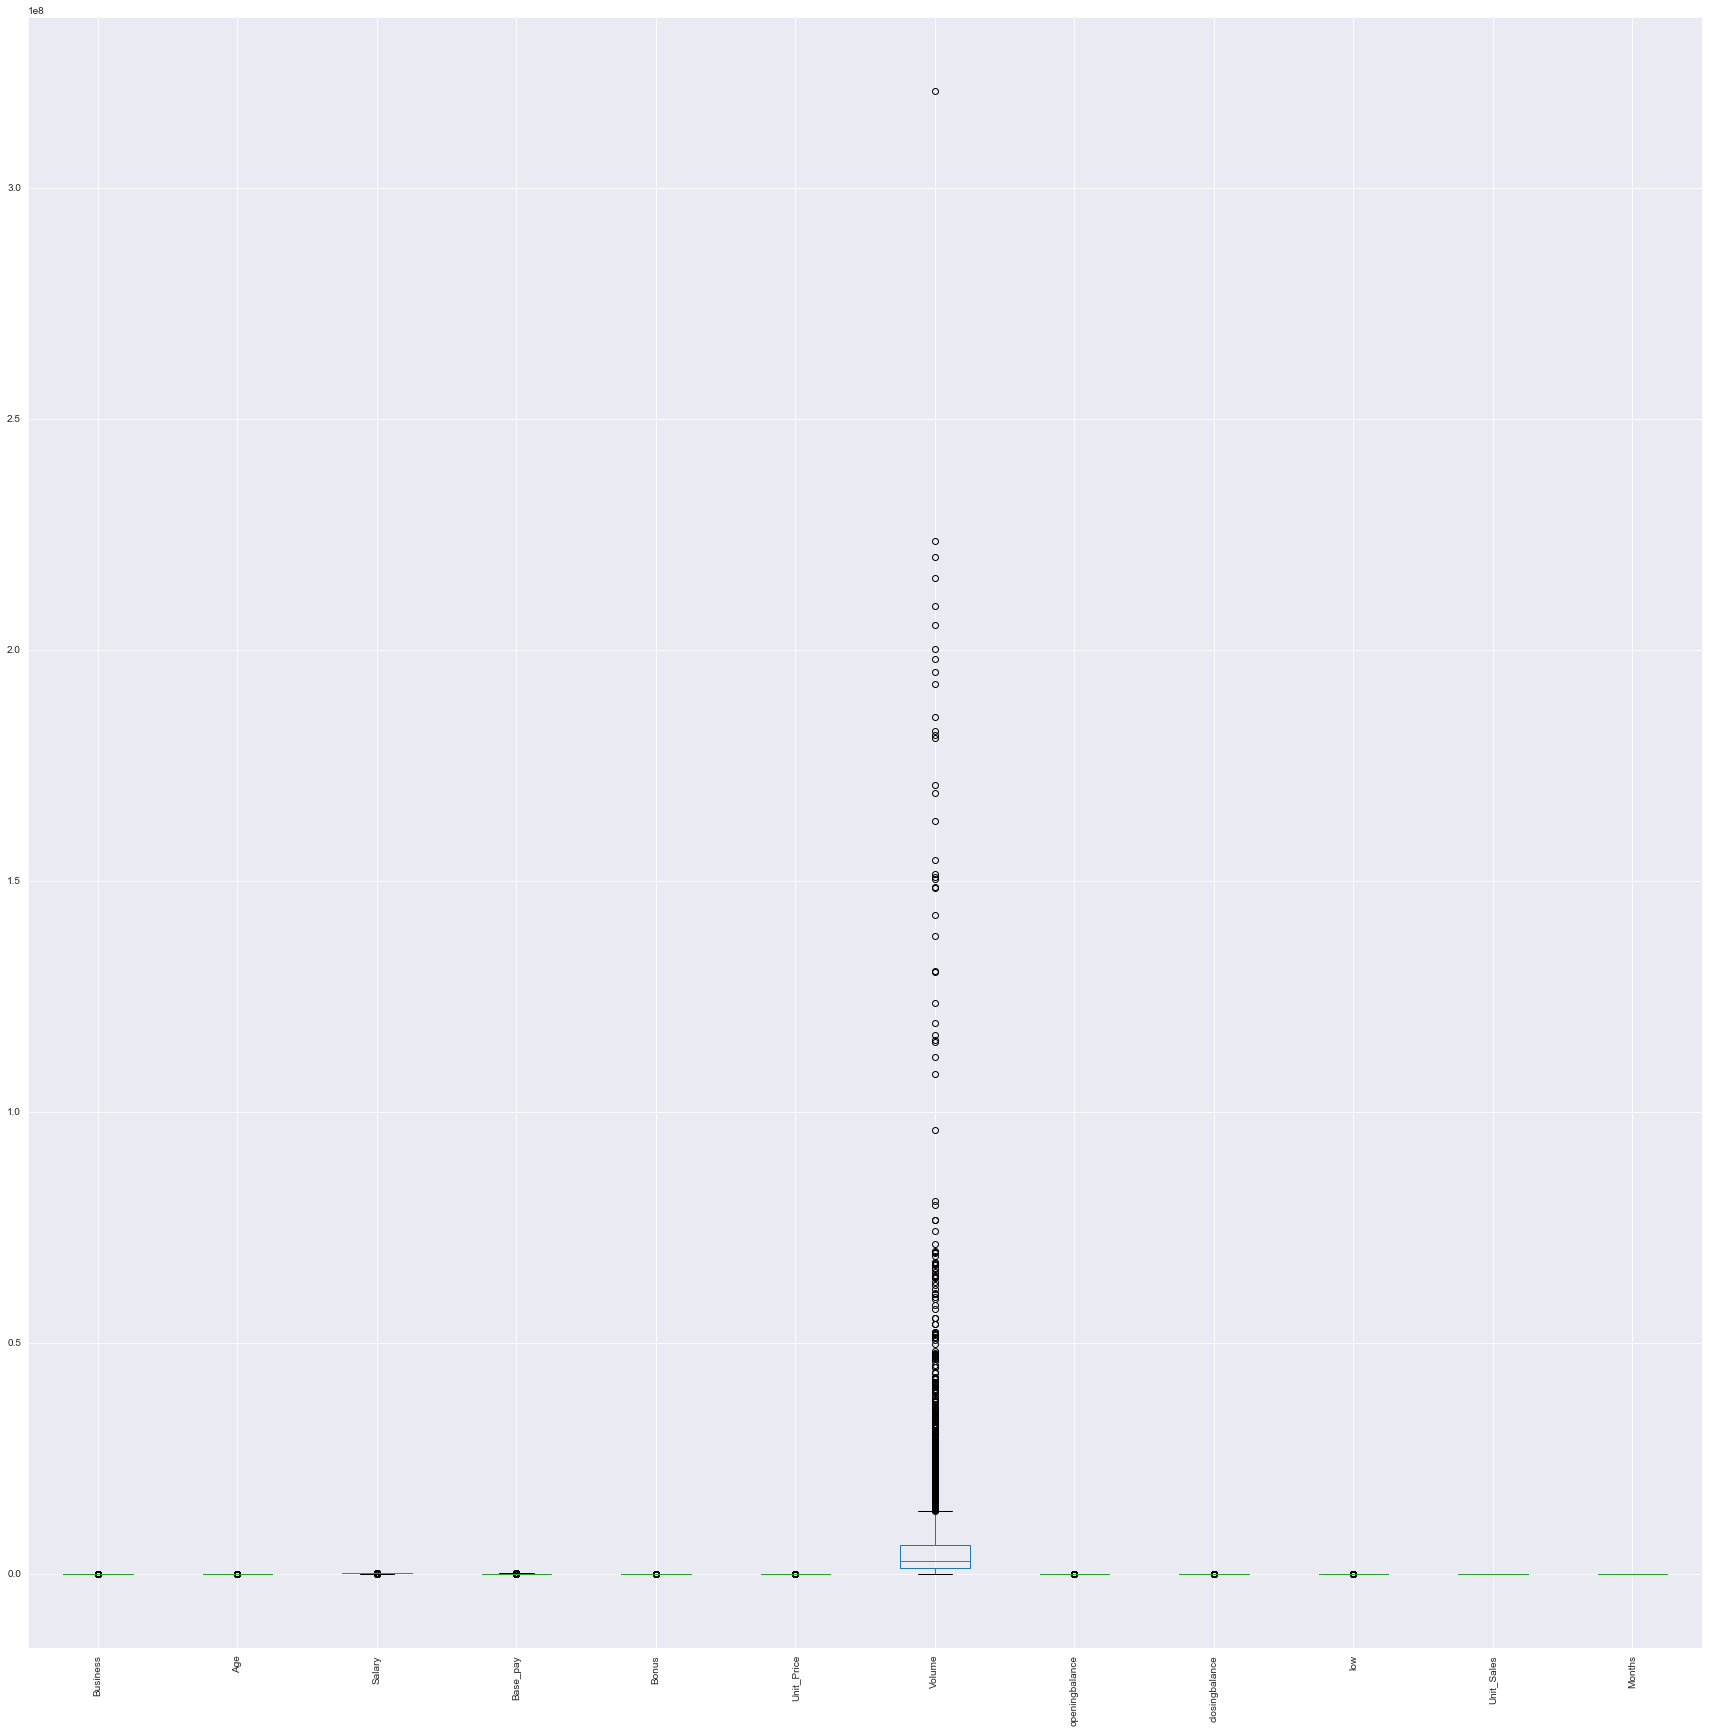

In [18]:
#Checking for outliers in the dataframe

# plot.figure() #placing the figure size to required dimensions
df.plot(kind='box',figsize=(30,30)) #Plotting boxplot and finding the outliers

plot.xticks(rotation='vertical')
plot.show() #used to show the graph


Here we can see there are outliers but we can't quite point them so we are going to check outliers individually

<AxesSubplot:xlabel='Unit_Sales'>

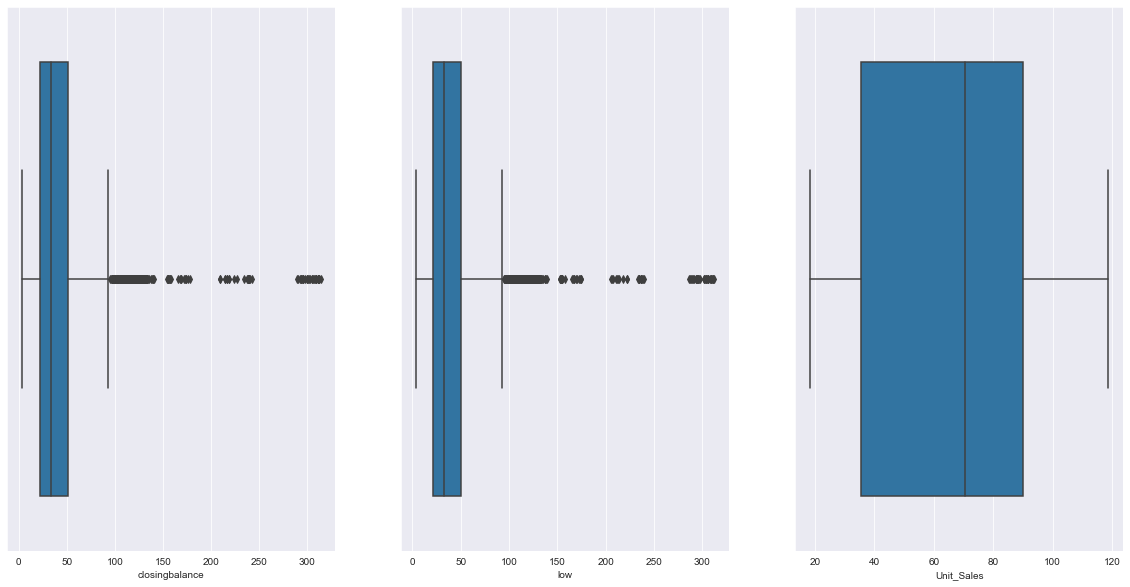

In [19]:
#checking for outliers in the data set
plot.figure(figsize=(20,10))

plot.subplot(131) #subplots used to plot three different plots in a row (place =1)
sns.boxplot(df['closingbalance']) #Boxplot for finding outliers 
plot.subplot(132) #subplots used to plot three different plots in a row (place=2)
sns.boxplot(df['low'])#Boxplot for finding outliers
plot.subplot(133) #subplots used to plot three different plots in a row (place=3)
sns.boxplot(df['Unit_Sales'])#Boxplot for finding outliers

<AxesSubplot:xlabel='Base_pay'>

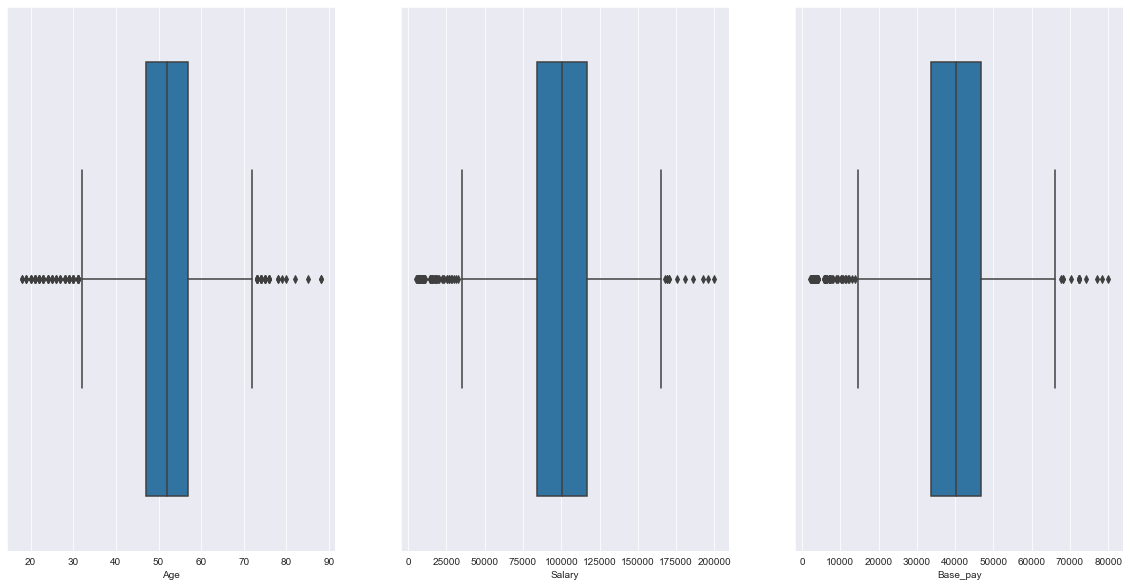

In [21]:
plot.figure(figsize=(20,10)) #Setting size of graph

plot.subplot(131) #subplots used to plot three different plots in a row (place =1)
sns.boxplot(df['Age']) #Boxplot for finding outliers 
plot.subplot(132)#subplots used to plot three different plots in a row (place=2)
sns.boxplot(df['Salary'])#Boxplot for finding outliers
plot.subplot(133)#subplots used to plot three different plots in a row (place=3)
sns.boxplot(df['Base_pay'])#Boxplot for finding outliers

<AxesSubplot:xlabel='Volume'>

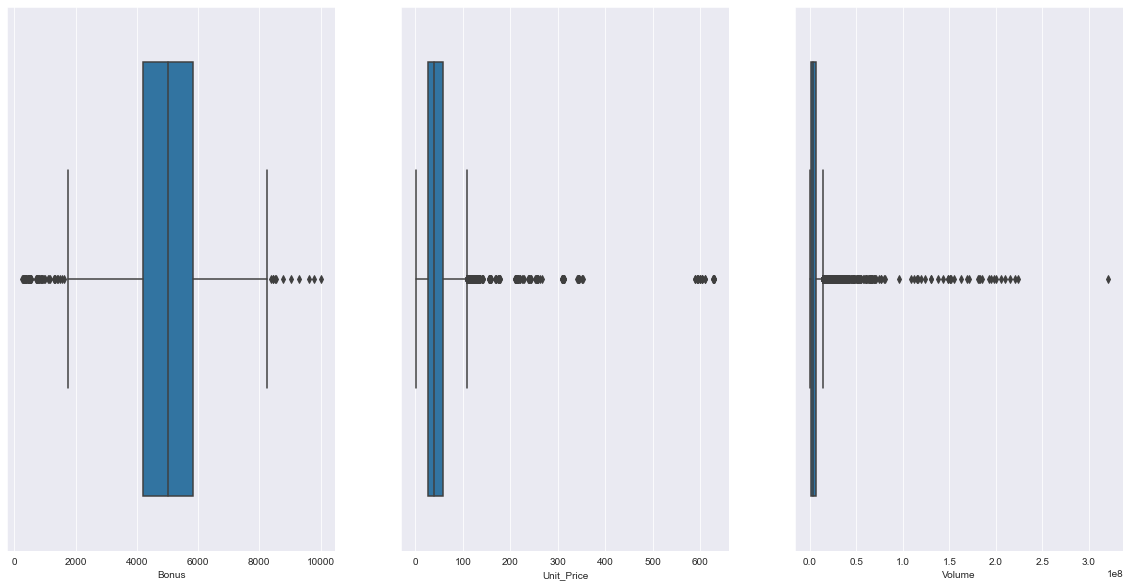

In [20]:
plot.figure(figsize=(20,10)) #Setting size of graph

plot.subplot(131)#subplots used to plot three different plots in a row (place =1)
sns.boxplot(df['Bonus'])#Boxplot for finding outliers 
plot.subplot(132)#subplots used to plot three different plots in a row (place=2)
sns.boxplot(df['Unit_Price'])#Boxplot for finding outliers 
plot.subplot(133)#subplots used to plot three different plots in a row (place=3)
sns.boxplot(df['Volume'])#Boxplot for finding outliers 

<AxesSubplot:xlabel='Months'>

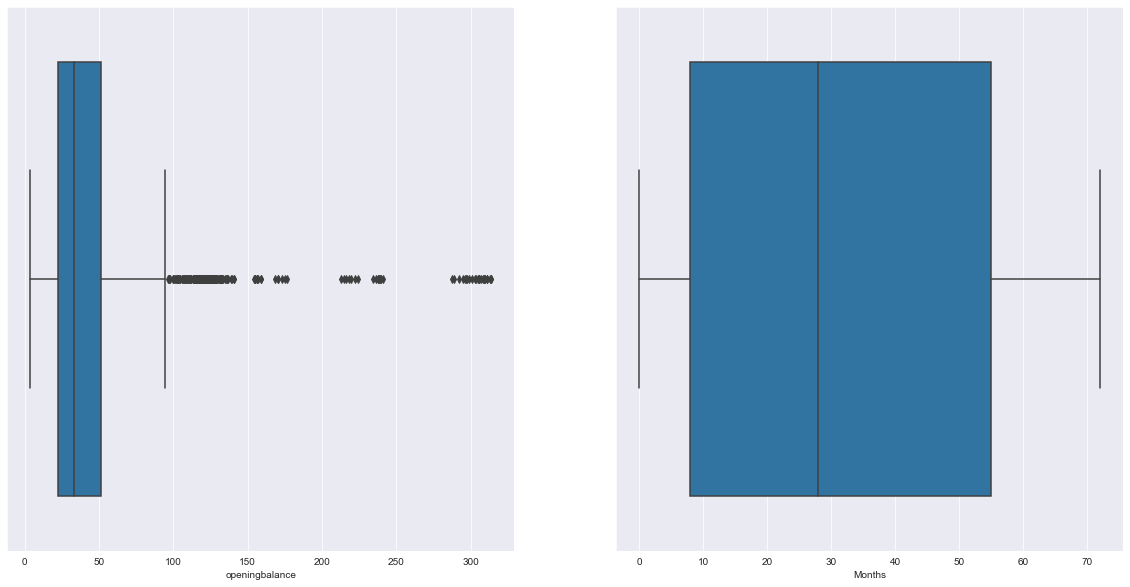

In [22]:
plot.figure(figsize=(20,10)) #Setting size of graph

plot.subplot(121) #subplots used to plot three different plots in a row (place =1)
sns.boxplot(df['openingbalance'])#Boxplot for finding outliers 

plot.subplot(122)#subplots used to plot three different plots in a row (place=2)
sns.boxplot(df['Months'])#Boxplot for finding outliers

As  we can see there are outliers in columns:
openingbalance,Volume,UNit_price,Bonus,Age,Salary,Base_pay,closing_balance,low

We can also see that there are large number of outliers and if we remove them around 30% of data will be removed,
So we are going to be leave the outliers


As there are Outliers in the the columns Total_Sales,openingbalance,Base_pay 
we are going to fill the nan with Median,
AS Median is not sensitive to outliers as Mean is

In [23]:
#Replacing all the nan values with the median as the data has outliers
df['Total_Sales']=df['Total_Sales'].fillna(df['Total_Sales'].median())
df['openingbalance']=df['openingbalance'].fillna(df['openingbalance'].median())
df['Base_pay']=df['Base_pay'].fillna(df['Base_pay'].median())

In [24]:
#checking whether all the null values in the data are handled or not
df.isnull().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

2.Checking For NOrmality of the columns
-----------------------------------------------------------

In [25]:
#performing nrmality check to verify whether the data is normally distributed or not
pg.normality(df)

,W,pval,normal
Business,0.440457,0.000000e+00,False
Age,0.990820,1.691929e-17,False
Salary,0.987063,5.153616e-21,False
Base_pay,0.986482,1.727304e-21,False
Bonus,0.987062,5.151575e-21,False
Unit_Price,0.553489,0.000000e+00,False
Volume,0.326129,0.000000e+00,False
openingbalance,0.618410,0.000000e+00,False
closingbalance,0.709553,0.000000e+00,False
low,0.709145,0.000000e+00,False


As we can see from the data that no column is Normally distributed
And we can also see that P value is less than 0.05 so we reject the null hypothesis.
SO none of the above features is normally distributed.

In [26]:
#Checking the skewness of the columns
df.skew()

Business          1.855409
Age              -0.259971
Salary           -0.396042
Base_pay         -0.365355
Bonus            -0.396042
Unit_Price        5.989663
Volume            8.709735
openingbalance    4.094791
closingbalance    3.226368
low               3.233667
Unit_Sales       -0.225447
Total_Sales       0.976270
Months            0.257274
dtype: float64

3.Finding out the correlation between variables using spearman rank correlation
-------------------------------------------------------------------------------------------------------------------

1.The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation.
2.Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines.


                Business       Age    Salary  Base_pay     Bonus  Unit_Price  \
Business        1.000000 -0.008435 -0.018403 -0.019291 -0.018403   -0.019480   
Age            -0.008435  1.000000  0.202282  0.192531  0.202282    0.128266   
Salary         -0.018403  0.202282  1.000000  0.993744  1.000000    0.811713   
Base_pay       -0.019291  0.192531  0.993744  1.000000  0.993744    0.808168   
Bonus          -0.018403  0.202282  1.000000  0.993744  1.000000    0.811713   
Unit_Price     -0.019480  0.128266  0.811713  0.808168  0.811713    1.000000   
Volume         -0.002192 -0.039345 -0.390488 -0.390008 -0.390488   -0.324230   
openingbalance  0.004834  0.078137  0.171981  0.163022  0.171981    0.097258   
closingbalance -0.007485  0.440989  0.346498  0.339595  0.346498    0.263699   
low            -0.018103  0.202040  0.999859  0.993597  0.999859    0.812412   
Unit_Sales     -0.018363  0.202268  0.999997  0.993740  0.999997    0.811735   
Months         -0.012282  0.222837  0.60

<AxesSubplot:>

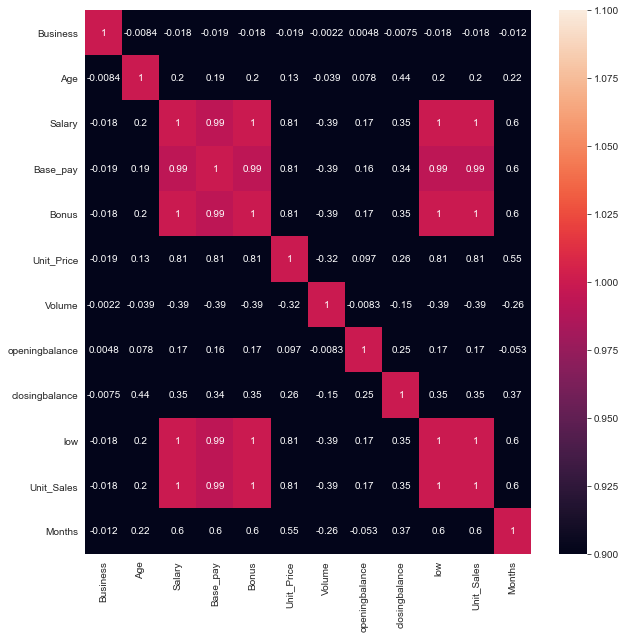

In [27]:
from scipy.stats import spearmanr #importing spearmanr to check the correlation
rel=df.corr(method='spearman') #performing corelation analysis on all columns
print(rel)
fig=plot.subplots(figsize=(10,10))
sns.heatmap(rel,vmin=1,vmax=1,annot=True)#USing heat map to show the corelation between columns


As we can see that the salary has highest corelation with Unit_Sales,Low,Bonus,Base_pay

Checking the relation ships between categorical and other dependent variables('Salary') which we require.
-------------------------
1.relation between salary and Rating
2.Relation between Salary and Education
3.Relation Between Dependancies and Salary
4.

In [28]:
#Relation between Salary and Rating
df.groupby('Rating')[['Salary']].mean()
#Using groupby function to check how the average salary is being depending on Rating rated by the Supervisor

,Salary
Rating,
No,99698.728362
Yes,100166.103897


..Here we can see that The people who got good rating has highest salary average compared to the not rated employees
..It shows that Rating is being depenedent on salary

In [31]:
#Relation between Salary and Education
df.groupby('Education')[['Salary']].mean()
#Using groupby function to check how the average salary is being depending on Education completed by the Employee.

,Salary
Education,
Graduation,91731.465271
High School or less,8021.192905
Intermediate,8797.040201
PG,106455.698134


Here we can see that the employees doing PG has Highest average paid Salary Followed by Graduation,Intermediateand Highschool or less
And So we can understand that if the employee is has higher studies he gets higher salary.

In [32]:
#Relation Between Dependancies and Salary
df.groupby('Dependancies')[['Salary']].mean()
#Using groupby function to check how the average salary is being depending on number of dependants the employee have.

,Salary
Dependancies,
No,99718.877889
Yes,100067.965503


Here we can see that the person having Dependant persons are having higher average salary than non dependant person 

In [33]:
#Relation Between Billing and Salary

df.groupby('Billing')[['Salary']].mean()
#Using groupby function to check how the average salary is being depending on Billing done by the Employee.

,Salary
Billing,
No,99561.128404
Yes,100002.265327


Here we can see that the number of persons having billing is higher than the number of persons not having billing

In [35]:
#Relation Between Calls and Salary

df.groupby('Calls')[['Salary']].mean()
#Using groupby function to check how the average salary is being depending on authority to accept Calls by the Employee.


Here we can see that the number of persosns recieving calls on an average has higher salary than the persons who are not able to recieve the calls may be this is because the people with higher position are only allowed to recieve the calls.

In [24]:
#checking the unique values of Education and Rating
Education=df['Education'].unique() #Unique gives us the Unique values in the column Eduaction
print('Education',Education)
Rating=df['Rating'].unique()#Unique gives us the Unique values in the column Rating
print('Rating',Rating)

Education [1 2 0 3]
Rating [1 0]


We are going to check the skewness of the columns using Distplot

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

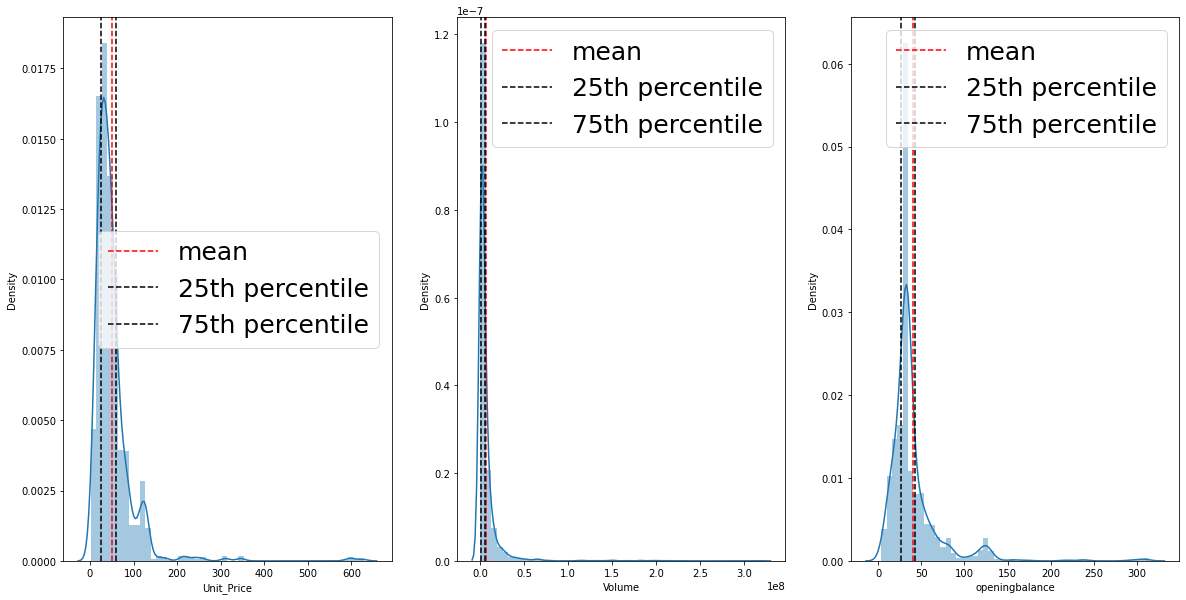

In [25]:
plot.figure(figsize=(20,10))
plot.subplot(131) #subplots used to plot three different plots in a row (place =1)
sns.distplot(df['Unit_Price']) #showing distributing plot for Unit_Price
plot.axvline(x=np.mean(df['Unit_Price']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Unit_Price'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Unit_Price'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

plot.subplot(132) #subplots used to plot three different plots in a row (place =2)
sns.distplot(df['Volume']) #showing distributing plot for Volume
plot.axvline(x=np.mean(df['Volume']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Volume'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Volume'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

plot.subplot(133) #subplots used to plot three different plots in a row (place =3)
sns.distplot(df['openingbalance']) #showing distributing plot for Openingbalance
plot.axvline(x=np.mean(df['openingbalance']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['openingbalance'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['openingbalance'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

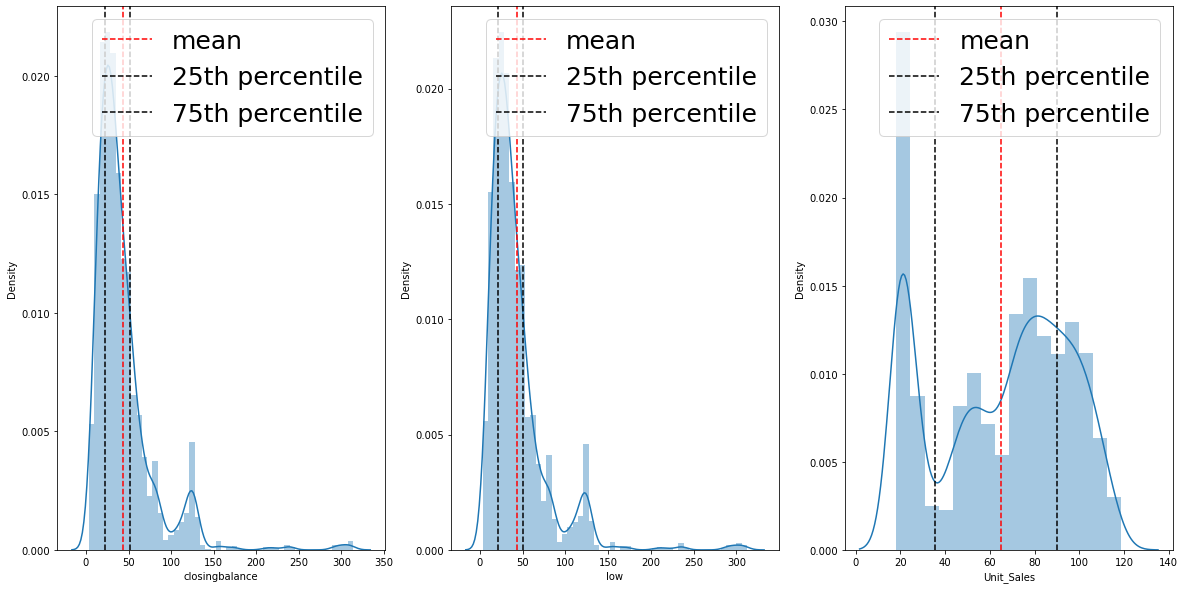

In [26]:
plot.figure(figsize=(20,10))

plot.subplot(131) #subplots used to plot three different plots in a row (place =1)
sns.distplot(df['closingbalance'])#showing distributing plot for closinggbalance
plot.axvline(x=np.mean(df['closingbalance']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['closingbalance'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['closingbalance'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 
plot.subplot(132) #subplots used to plot three different plots in a row (place =2)
sns.distplot(df['low'])#showing distributing plot for low
plot.axvline(x=np.mean(df['low']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['low'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['low'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 
plot.subplot(133) #subplots used to plot three different plots in a row (place =3)
sns.distplot(df['Unit_Sales'])#showing distributing plot for Unit_Sales
plot.axvline(x=np.mean(df['Unit_Sales']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Unit_Sales'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Unit_Sales'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

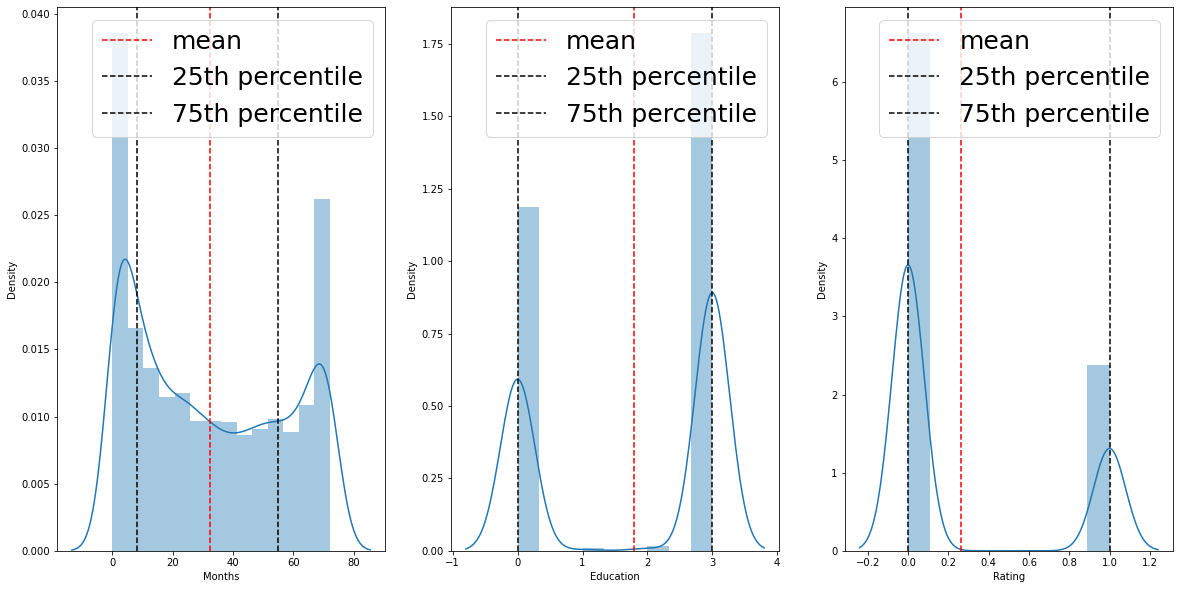

In [27]:
plot.figure(figsize=(20,10))

plot.subplot(131) #subplots used to plot three different plots in a row (place =1)
sns.distplot(df['Months'])#showing distributing plot for Months
plot.axvline(x=np.mean(df['Months']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Months'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Months'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

plot.subplot(132) #subplots used to plot three different plots in a row (place =2)
sns.distplot(df['Education'])#showing distributing plot for Education
plot.axvline(x=np.mean(df['Education']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Education'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Education'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

plot.subplot(133) #subplots used to plot three different plots in a row (place =3)
sns.distplot(df['Rating'])#showing distributing plot for Rating
plot.axvline(x=np.mean(df['Rating']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Rating'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Rating'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

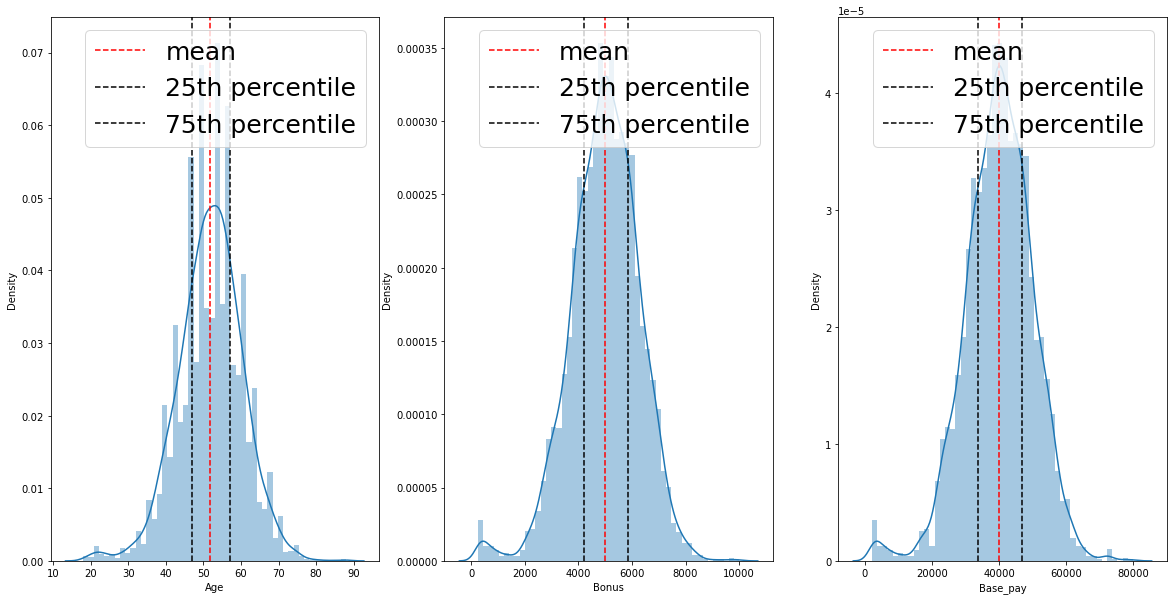

In [28]:
plot.figure(figsize=(20,10))

plot.subplot(131) #subplots used to plot three different plots in a row (place =1)
sns.distplot(df['Age'])#showing distributing plot for Months
plot.axvline(x=np.mean(df['Age']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Age'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Age'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

plot.subplot(132) #subplots used to plot three different plots in a row (place =2)

sns.distplot(df['Bonus'],kde=True)
plot.axvline(x=np.mean(df['Bonus']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Bonus'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Bonus'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 


plot.subplot(133) #subplots used to plot three different plots in a row (place =3)
sns.distplot(df['Base_pay'])#showing distributing plot for Rating
plot.axvline(x=np.mean(df['Base_pay']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Base_pay'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Base_pay'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


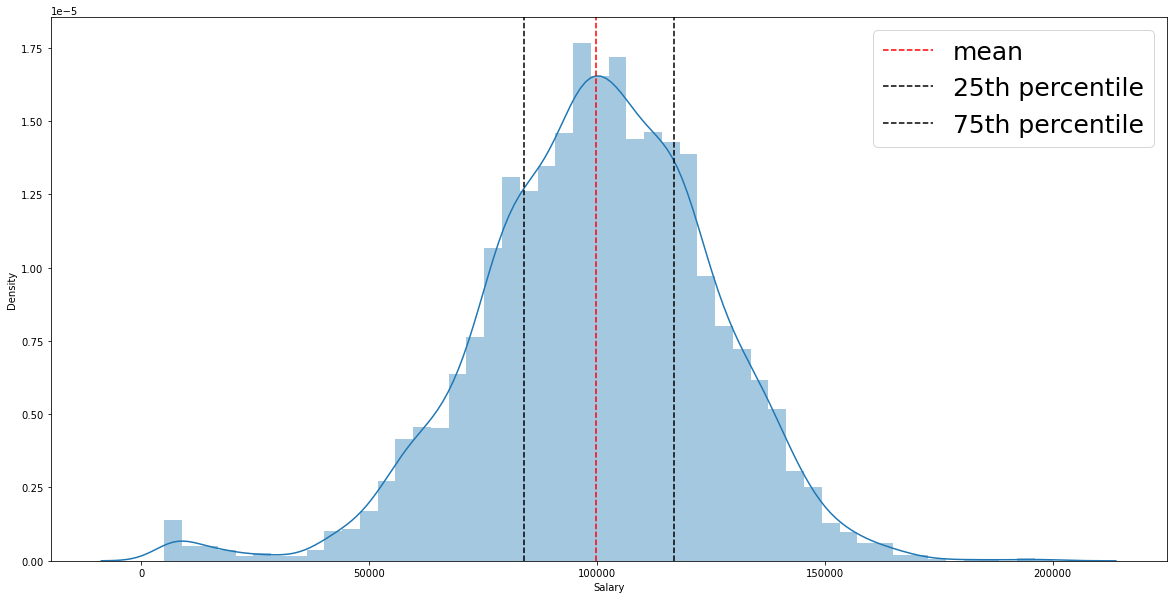

In [29]:
plot.figure(figsize=(20,10))


sns.distplot(df['Salary'])#showing distributing plot for Education
plot.axvline(x=np.mean(df['Salary']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Salary'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Salary'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

Here we saw that the columns which are normally distributed with reference to above plot are Salary,Bonus,Base_pay,Age
So we are going to convert the remaining required columns into normal by using log Transformation and Squareroot transformation

In [30]:
df['Volume']=np.sqrt(df['Volume']) #Using Square root transformation to change volume
df['openingbalance']=np.log(df['openingbalance']) # Using Log transformation to convert openingbalance
df['closingbalance']=np.log(df['closingbalance'])# Using Log transformation to convert closingbalance

1.Removing the columns which are less corelated to salary
2.Removing the highly corelated columns can change there relation 

1.The columns which are less corelated with the salary are (closingbalance,openingbalance,volume)

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

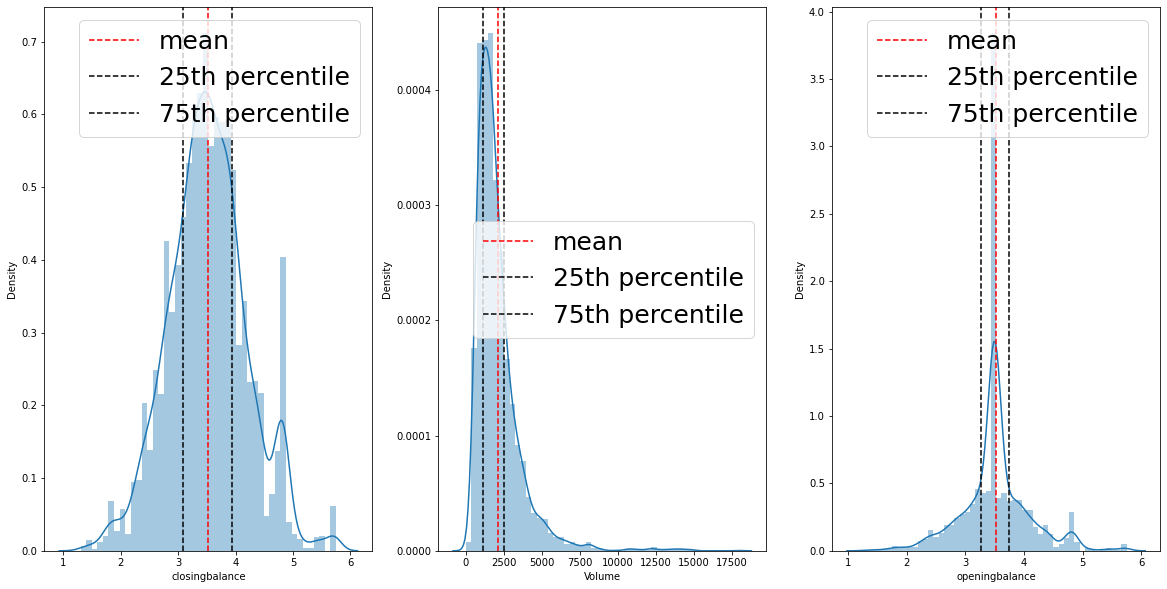

In [31]:
plot.figure(figsize=(20,10))

plot.subplot(131)
sns.distplot(df['closingbalance'])
plot.axvline(x=np.mean(df['closingbalance']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['closingbalance'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['closingbalance'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

plot.subplot(132)
sns.distplot(df['Volume'])
plot.axvline(x=np.mean(df['Volume']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['Volume'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['Volume'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 

plot.subplot(133)
sns.distplot(df['openingbalance'])
plot.axvline(x=np.mean(df['openingbalance']),c='r',ls='--',label='mean') #here we are providing the mean line to check the skewmness
plot.axvline(x=np.percentile(df['openingbalance'],25),c='black',ls='--',label='25th percentile')#here we are providing details for 25th percentile
plot.axvline(x=np.percentile(df['openingbalance'],75),c='black',ls='--',label='75th percentile')#here we are providing details for 75th percentile
plot.legend(fontsize=25) 



Here we can see that the closing balance and opening balance are little similar to normal distribution now


In [32]:
#checking for skewness again in the data frame to check whether the skewness of Volume, opening balance and closingbalance
df.skew()


Business          1.855409
Rating            1.073441
Age              -0.259971
Salary           -0.396042
Base_pay         -0.365355
Bonus            -0.396042
Unit_Price        5.989663
Volume            3.293185
openingbalance    0.236776
closingbalance    0.143824
low               3.233667
Unit_Sales       -0.225447
Total_Sales       0.976270
Months            0.257274
Education        -0.410609
dtype: float64

                Business    Rating       Age    Salary  Base_pay     Bonus  \
Business        1.000000  0.147498 -0.008435 -0.018403 -0.019291 -0.018403   
Rating          0.147498  1.000000 -0.009196  0.009708  0.009641  0.009708   
Age            -0.008435 -0.009196  1.000000  0.202282  0.192531  0.202282   
Salary         -0.018403  0.009708  0.202282  1.000000  0.993744  1.000000   
Base_pay       -0.019291  0.009641  0.192531  0.993744  1.000000  0.993744   
Bonus          -0.018403  0.009708  0.202282  1.000000  0.993744  1.000000   
Unit_Price     -0.019480  0.018395  0.128266  0.811713  0.808168  0.811713   
Volume         -0.002192 -0.014256 -0.039345 -0.390488 -0.390008 -0.390488   
openingbalance  0.004834 -0.003804  0.078137  0.171981  0.163022  0.171981   
closingbalance -0.007485 -0.020443  0.440989  0.346498  0.339595  0.346498   
low            -0.018103  0.009629  0.202040  0.999859  0.993597  0.999859   
Unit_Sales     -0.018363  0.009745  0.202268  0.999997  0.993740

<AxesSubplot:>

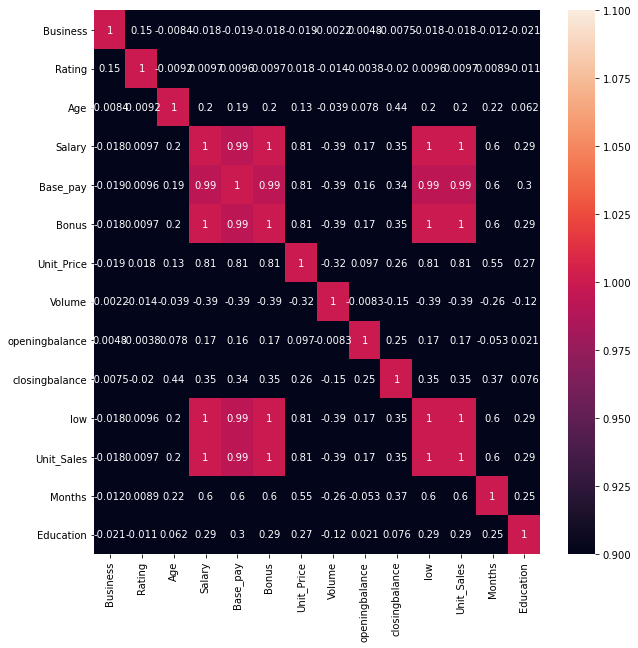

In [33]:
#checking again for corelation after logtransformation
rel=df.corr(method='spearman') #performing corelation analysis on all columns
print(rel) #printing to find it numericaly
fig=plot.subplots(figsize=(10,10))
sns.heatmap(rel,vmin=1,vmax=1,annot=True)#USing heat map to show the corelation between columns

how salary is varying with respect to other considerable factors.
-------------------------------------------------------------------------------------------
Using spearman corelation we found out that the Salary has good corelation with BOnus,Base_pay,Unit_Sales,Total_Sales,Low
we are going to show there relation ship now

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male      2528
Female    2472
Name: Gender, dtype: int64

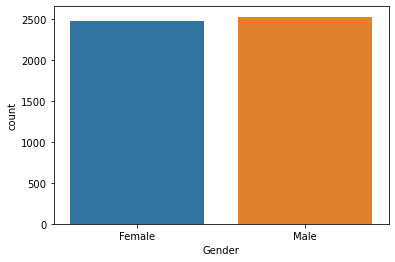

In [34]:
sns.countplot(df['Gender']) #provides you the number of males and females present in the dataframe
df['Gender'].value_counts() #NUmerical representation

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Month-to-month    2777
Two year          1195
One year          1028
Name: Type, dtype: int64

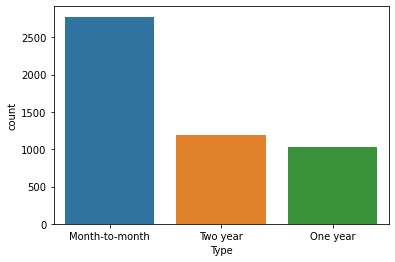

In [35]:
sns.countplot(df['Type']) #checking the number of members having different types of salary payment
df['Type'].value_counts()#Numerical representation

HEre we can see that the number of members having Month to Month salaray intake is higher than other modes.

Yes    2956
No     2044
Name: Billing, dtype: int64

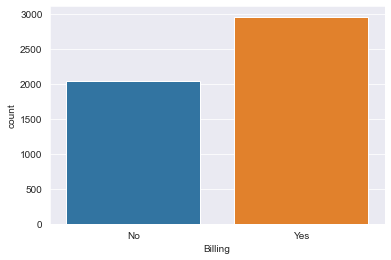

In [41]:
sns.countplot(df['Billing'])#checking how many people are billing 
df['Billing'].value_counts()# Numerical Representation

We can see that the number of persons having billing is greater than the number of persons not having billing

Female  Male
668     650     1
1804    1878    1
dtype: int64

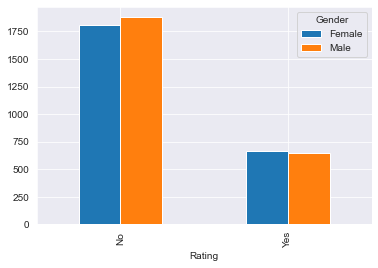

In [50]:
cr=pd.crosstab(df.Rating,df.Gender)
cr.plot.bar()
cr.value_counts()

HEre we can see that:
    1.Female has less number of people having Rating and the same goes for Male
    2.the non Rated members in the female is lesser compared to the Male
    3.The Rated employees in males are higher than Female

<AxesSubplot:xlabel='Type', ylabel='count'>

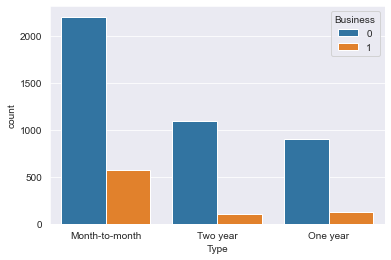

In [53]:
sns.countplot(df.Type,hue=df.Business)

Even in the persons undergoing bussiness Month to Month is higher in Bussiness than Two year and One year 
MAy be this is because the Type of payment for two and  one year is Contract Basis or the share holding values which resulted in less members having them.

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus', ylabel='Salary'>

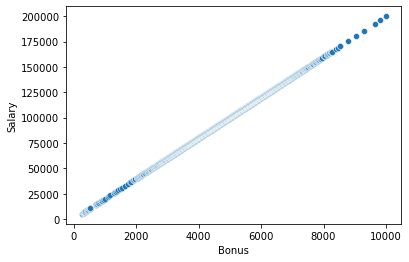

In [37]:
sns.scatterplot(df['Bonus'],df['Salary']) # checking relation between salary and Bonus

Here bonus and salary are in positive linear corealtion (as salary increases bonus increases)

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unit_Sales', ylabel='Salary'>

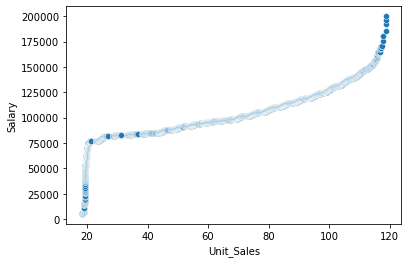

In [38]:
sns.scatterplot(df['Unit_Sales'],df['Salary'])## checking relation between salary and UNitsales

here we can see monotonic increase (as UNit_Sales increases Salary INcreases)
so it means that the the person who has high unit sales should be provided with better salary


C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Base_pay', ylabel='Salary'>

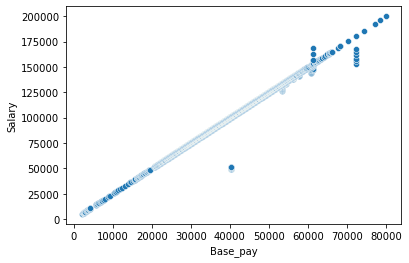

In [39]:
sns.scatterplot(df['Base_pay'],df['Salary'])## checking relation between salary and Base_pay

Here Base_pay and salary are in positive linear corealtion (as salary increases basepay increases)

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='low'>

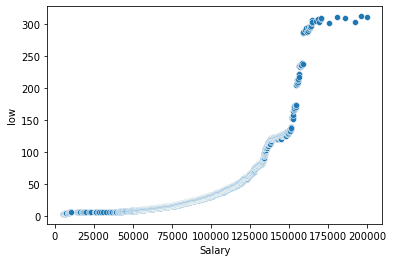

In [40]:
sns.scatterplot(df['Salary'],df['low']) # checking relation between salary and low

Here you can see that there is monotonic increase (As Salary increases the Low always increase)

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='Unit_Price'>

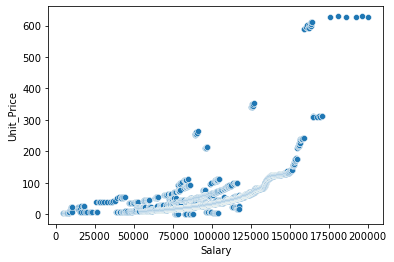

In [41]:
sns.scatterplot(df['Salary'],df['Unit_Price']) # checking relation between salary and Unit_price

As the spearman Corelation suggests there is no relation between SAlary and Unit_price

In [55]:
#Using LabelEncoder to convert the Education and Rating columns as they are necessary for machine learning algorithm
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #calling labelencoder
cols=['Education','Rating','Type','Billing','Dependancies','Gender','Calls'] #taking the columns required to undergoe label encoding
df[cols]=df[cols].apply(le.fit_transform) #applying LabelEncoder on the columnns
df


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,0,0,1,0,0,1,18,5089.00,2035.600,254.4500,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.8,0,1
1,0,0,0,1,0,0,1,19,5698.12,2279.248,284.9060,3.740000,10462800,3.850000,3.680000,3.650000,18.40,18.85,0,1
2,1,0,0,1,0,1,0,22,5896.65,2358.660,294.8325,3.890000,18761000,4.230000,4.290000,3.720000,18.70,18.9,0,1
3,0,1,0,1,0,1,1,21,6125.12,2450.048,306.2560,4.350000,66130600,4.260000,4.310000,3.830000,18.75,19,0,1
4,1,0,0,1,0,1,1,23,6245.00,2498.000,312.2500,4.340000,26868200,4.790000,4.410000,4.080000,18.80,19.05,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,1,0,0,0,72,180696.80,72278.720,9034.8400,629.511067,3927000,33.119999,293.838840,310.955001,117.80,1395.65,72,3
4996,1,0,0,1,0,1,0,73,185685.90,74274.360,9284.2950,627.841071,6031900,33.119999,301.311314,309.610028,118.60,1395.65,72,3
4997,1,0,0,1,0,1,0,74,192636.80,77054.720,9631.8400,625.860033,7949400,33.119999,306.040009,303.483494,118.60,1395.65,72,3
4998,1,1,0,1,0,1,1,74,195970.70,78388.280,9798.5350,629.510005,3908400,33.119999,308.579987,312.432438,118.65,1395.65,72,3


Apply ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable for the same.
-------------------------------------------------------------------------------------------------------------------------------------

In [56]:
#Taking all required numerical values into a new dataframe to model 
df1=df[['Business','Age','Salary','Base_pay','Bonus','Unit_Price','Volume','openingbalance','closingbalance','low','Unit_Sales','Total_Sales','Months','Education']]
df1.head() #printig the top  5 rows

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,1
1,0,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,1
2,0,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,1
3,1,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,1
4,0,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,1


In [89]:
X=df1.drop('Salary',axis=1) #taking all the columns except salary as Salary is dependent variable

In [67]:
X_list=list(x.columns) #listing out the columns  which we are taking in x as independent variables
X_list

['Business',
 'Age',
 'Base_pay',
 'Bonus',
 'Unit_Price',
 'Volume',
 'openingbalance',
 'closingbalance',
 'low',
 'Unit_Sales',
 'Total_Sales',
 'Months',
 'Education']

In [59]:
y=df1['Salary'] #Placing Salary as an dependent variable  for model
y

0         5089.00
1         5698.12
2         5896.65
3         6125.12
4         6245.00
          ...    
4995    180696.80
4996    185685.90
4997    192636.80
4998    195970.70
4999    199970.74
Name: Salary, Length: 5000, dtype: float64

[1.51957591e-06 4.42512182e-03 8.53212813e-02 1.71089117e-01
 6.04862119e-04 1.31094740e-05 2.98661397e-03 9.77736934e-03
 1.16871650e-01 4.23668558e-01 1.17248570e-01 6.74350111e-02
 5.57216762e-04]


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

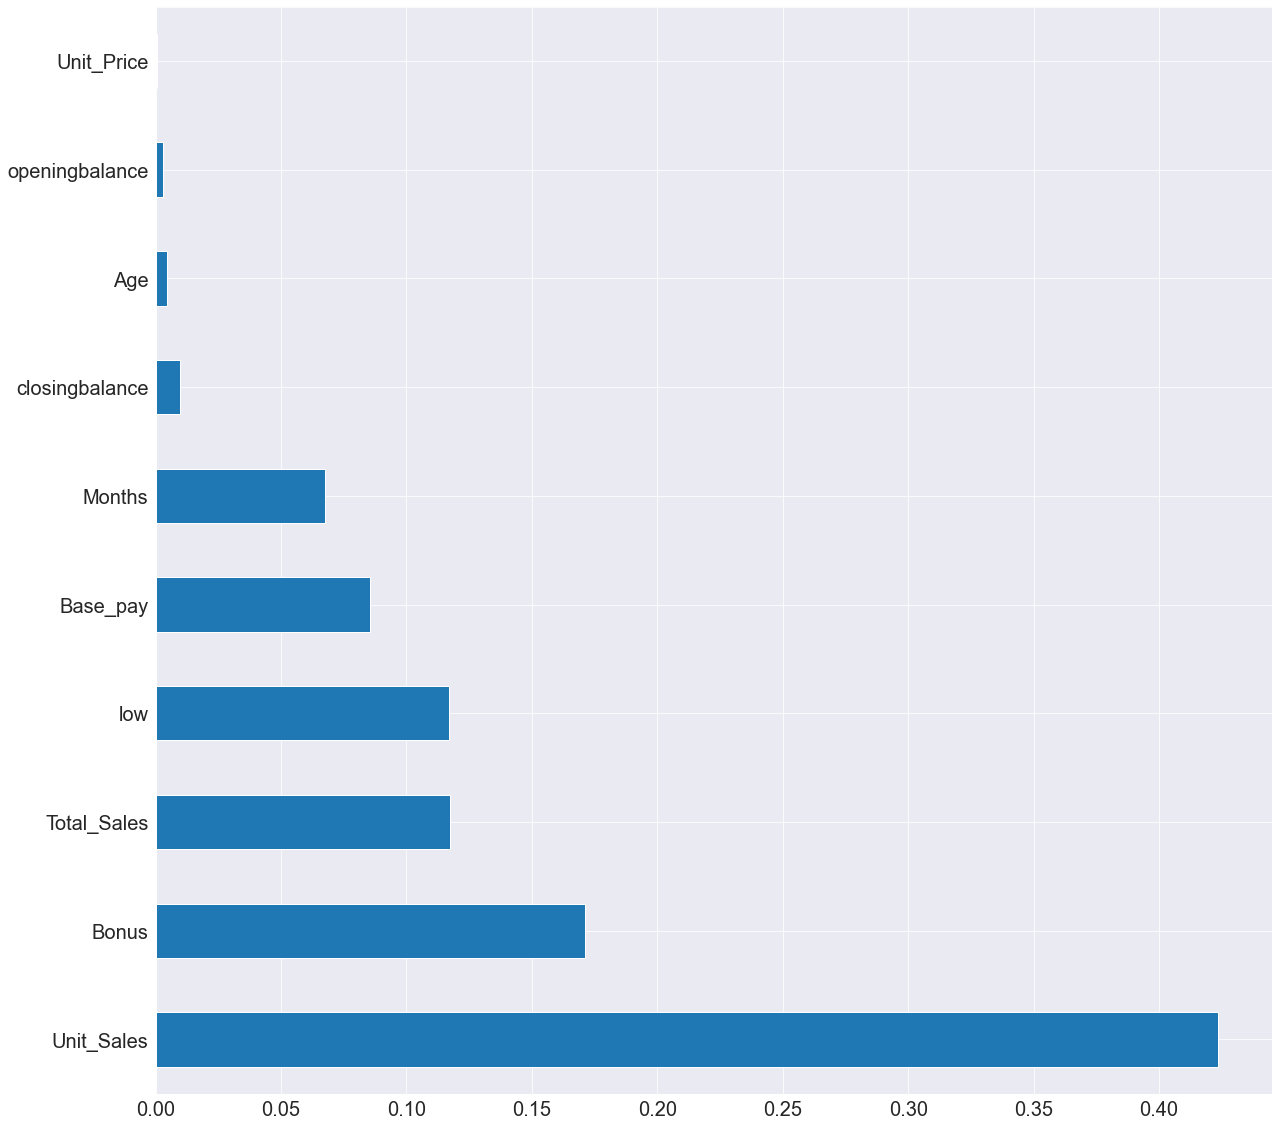

In [88]:
from sklearn.ensemble import ExtraTreesRegressor #importing extratreesregressor
model = ExtraTreesRegressor()          #instancing the model for feature selection
model.fit(X,y)                         #fitting the data into the model
print(model.feature_importances_)      #use inbuilt class feature_importances of tree based regressor
                                       #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(20,20)); #taking the top 10 important features from the dataset
plot.yticks(fontsize=20)
plot.xticks(fontsize=20)

Here we can see that from the above bar plot we can understand that 'Unit_Sales','Bonus','Total_Sales','low','Base_pay','Months','closingbalance','Age','Unit_Price' have importance

In [90]:
x=df1[['Unit_Sales','Bonus','Total_Sales','low','Base_pay','Months','closingbalance','Age','Unit_Price']]
#Taking the features that are important to the data

splitting x and y into test and train using train_test_split
---

In [91]:
# splitting x and y into test and train using train_test_split
# for processing the test into the model  
from sklearn.model_selection import train_test_split #importing train_test_split from model_selection
from sklearn import metrics
#splitting X and Y into train and test splits
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=10) #HEre we are splitting it with 33% test and 67% train

#Checking how many rows and columns are present in train and test of x and y 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3350, 9)
(1650, 9)
(3350,)
(1650,)


Checking for which Algorithm to use:
----
1.Linear regressor : we can't use linear regression because the values are non paramteric and non-linear
2.Logistic regression: we can't use logistic regression because the values are not binary
3.decision tree Regression: we can use it but we can't be sure it is good for our model
4.Random Forest regressino:  we can use it too but we can't be sure it is good for our model

Performing test to find which model is better 

Checking which Model is good for Machine Learning
----------

In [92]:
# importing libraries for perforimng machine learning
from sklearn.ensemble import RandomForestRegressor #importing RandomForestRegressor as the model is numerical
from sklearn.metrics import mean_squared_error #Importing Mean_squarred_error to find the error
from sklearn.metrics import r2_score ##importing r2_score t check the precision of model
from sklearn.tree import DecisionTreeRegressor #importing RandomForestRegressor as the model is numerical


Checking Decision Tree
--

In [93]:
DTR=DecisionTreeRegressor(max_depth=3) #calling decision tree
DTR.fit(x_train,y_train) #fitting it into training data of  x and y 

DecisionTreeRegressor(max_depth=3)

In [94]:
print('DecisionTree_train:',DTR.score(x_train,y_train)) #finding out the trainning score of both x and y 
print('DecisionTree_test:',DTR.score(x_test,y_test)) #finding out the testing score of both x and y


DecisionTree_train: 0.9617197628021664
DecisionTree_test: 0.9643947886935025


Checking Random Forest
--

In [95]:
RFREG= RandomForestRegressor(n_estimators= 100) #calling Randomforestregressor and the n_estimator means number of trees
RFREG.fit(x_train, y_train) #fitting it into training data of x and y
print('RandomForestRegressor:',RFREG.score(x_train,y_train)) #finding out the trainning score of both x and y 
print('RandomForestRegressor:',RFREG.score(x_test,y_test))#finding out the testing score of both x and y

RandomForestRegressor: 0.9999850416381506
RandomForestRegressor: 0.999935793554653


Here we can clearly see that the RandomforestRegressor has better score than Decision Tree so we are going to use Randomforest Regressor

Starting with RandomForestRegressor
-------------------------------------------------------

In [96]:
#Before starting we have to decide the best n_estimator and Random_state for model
RFREG.fit(x_train, y_train) #Fitting it to training data of x and y
for i in range(4,20): #creating a for loop for estimator 
    for n in range (1,50): #creating a for loop for Random_state       
        RFREG= RandomForestRegressor(n_estimators=i,random_state=n) 
        RFREG.fit(x_train,y_train)        
        test=RFREG.score(x_test,y_test) #Adding the scoring values to test
        train=RFREG.score(x_train,y_train)#Adding the scoring values to train
        
        if(test>train): #providing a condition for test score to be greater than train score as test shoukd always be higher than train
            print(f'estimator: {i},random_state: {n}') #printing the values which are good          
            print('test:',test) #printing the test values which are good  
            print('train',train)#printing the train values which are good  
        

estimator: 4,random_state: 26
test: 0.9999564628512302
train 0.9998878352611551
estimator: 4,random_state: 35
test: 0.9998522100687749
train 0.9998022939138096
estimator: 5,random_state: 14
test: 0.9999143263197452
train 0.9998838522599727
estimator: 5,random_state: 26
test: 0.9999437445525026
train 0.9999195830823722
estimator: 5,random_state: 35
test: 0.9999034646796165
train 0.9998583270574195
estimator: 5,random_state: 36
test: 0.9999464404188126
train 0.9999220424074279
estimator: 5,random_state: 39
test: 0.9997606960353608
train 0.9996212964856909
estimator: 6,random_state: 14
test: 0.9999230711997267
train 0.9998791461675057
estimator: 6,random_state: 26
test: 0.9999573258210723
train 0.9999396041130116
estimator: 6,random_state: 39
test: 0.9997965638878445
train 0.9997301937120638
estimator: 7,random_state: 7
test: 0.999926504865938
train 0.9999141133616907
estimator: 7,random_state: 14
test: 0.9999331655520265
train 0.999905461443151
estimator: 7,random_state: 26
test: 0.99995

Here for estimator 4 and random_state=26 as we are getting better test value greater than train value 
so we are going to take these values

Performing Random Forest
--

In [97]:
RFREG= RandomForestRegressor(n_estimators=4,random_state=26) #calling Randomforestregressor with n_estimator=17 and random_state=35
RFREG.fit(x_train,y_train)#fitting data
y_pred= RFREG.predict((x_test)) # predicting the score with x_test
meanSquaredError=metrics.mean_squared_error(y_test, y_pred) #performing mean_squarred_error
print("MSE:", meanSquaredError) #printing mean_squared_error
rootMeanSquaredError = np.sqrt(meanSquaredError) #performing Root_mean_squarred_error
print("RMSE:", rootMeanSquaredError) #printing Root_mean_squarred_error
r2=r2_score(y_test,y_pred) #performing r2_score
print('r2_score_train :', r2) #printing r2_score

MSE: 27684.61456524013
RMSE: 166.38694229187615
r2_score_train : 0.9999564628512302


In [98]:
#we are going to check whether the values of the predicted and normal values are similar or not
t_1=pd.DataFrame({'Actual' :y_test,'Pred' : y_pred}) #Creating a dataframe having features naming Actual and predicted
print(t_1)

            Actual           Pred
245    57883.44624   57837.217235
4493  131156.47240  131160.083400
4583  133615.53540  133610.627300
2242   97647.63276   97648.543823
3407  112067.74690  112068.869875
...            ...            ...
2759  103686.52410  103682.325325
1287   84470.24398   84467.244948
3228  109749.00210  109745.608900
3261  110232.16230  110194.182025
895    78294.41021   78257.266807

[1650 rows x 2 columns]


We can see that both of them are maximum similar

Finding out whether the model is accurate or not?
----------

In [100]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 47.99 degrees.


In [101]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.92 %.


Here we can see that accuracy is 99.92% so we don't have to check for  any other model


Conclusion:
----------------------------
We found out that Random forest is best Model for the above dataset.
We also found out the
Mean Absolute Error: 47.99 degrees.
MSE: 27684.61456524013
RMSE: 166.38694229187615
r2_score_train : 0.9999564628512302
Accuracy: 99.92 %.

The factors effecting the Salary factor on which our Ml model will work are: 'Unit_Sales','Bonus','Total_Sales','low','Base_pay','Months','closingbalance','Age','Unit_Price'. after deploying we can figure out the best predicted salary according to the features supplied to the model and will give the best salary predicted.